<a href="https://colab.research.google.com/github/sagarkakkar03/Data-science/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is CAD?** CAD occurs when coronary arteries struggle to supply the heart with enough blood, oxygen, and nutrients, primarily due to cholesterol deposits (plaques) that narrow the arteries.

**Risk Factors**: Anyone can develop CAD. Risk factors include:

- **Age**: Older individuals may have more damaged and narrow arteries.
- **Sex**: Men are generally at greater risk, with risk increasing for women after menopause.
- **Existing Health Conditions**: High blood pressure, high cholesterol, diabetes, and being overweight increase risk.
- **Lifestyle**: Physical inactivity, chronic stress, an unhealthy diet, and smoking are significant contributors.
- **Family History**: A close relative diagnosed with early-onset heart disease increases personal risk.
- **Symptoms**: When arteries narrow, the heart doesn't get enough oxygen-rich blood, leading to:
  - *Angina*: Pressure or tightness in the chest.
  - *Shortness of breath*: When the heart can't pump enough blood to meet the body's needs.
  - *Extreme fatigue*: During activities.

Heart attack can occur if an artery is totally blocked, with classic signs including crushing chest pain, arm/shoulder pain, shortness of breath, and sweating. Some heart attacks may have minimal or no symptoms.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
    )
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('/content/heart_disease_uci.csv')

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Column Description

**cp**: chest pain type. There are 4 types of chest pain:
  * **typical angina**: Angina is chest discomfort that happens when the heart muscle doesn't get enough oxygen-rich blood, usually because the coronary arteries are narrowed (coronary artery disease). Classic heart-related chest pressure/tightness, usually triggered by exertion or stress and relieved by rest or nitroglycerin.
  * **atypical angina**: Chest discomfort with some angina features, but not all (e.g., not clearly exertional or not relieved by rest); may still be heart-related.
  * **non-anginal**: Chest pain that does not fit angina patterns (often sharp/localized, related to breathing or movement, or reproducible with touch); less likely due to coronary artery disease.
  * **asymptomatic**: No chest pain symptoms reported (heart disease can still be present without pain in some people).

**trestbps**: trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital)).
 - Normal (healthy range):
   For most adults, normal blood pressure is:
   Systolic < 120 and Diastolic < 80 mm Hg
 - High blood pressure (This doesn't necessarily signify heart disease.
   Elevated: 120–129 and <80

   Stage 1 hypertension: 130–139 or 80–89

   Stage 2 hypertension: ≥140 or ≥90
   
   Hypertensive crisis: >180 and/or >120 (urgent/emergency depending on symptoms)

**chol** (Cholestrol measure): Total serum cholesterol (often just called total cholesterol) is the total amount of cholesterol in your blood measured from a blood sample (“serum” is the liquid part of blood after clotting).
 - Desirable < 200
 - Borderline high: 200–239
 - High: ≥ 240

**fbs**: fasting blood sugar. Blood glucose measured after not eating for at least ~8 hours.
 - fasting blood sugar> 120 mg is dangerous.
 - Higher fasting blood sugar can indicate impaired glucose control/diabetes, which increases heart-disease risk.

 **restecg**: resting ECG (electrocardiogram) results — heart's electrical activity recorded while at rest. A resting ECG reflects the heart's electrical conduction and can show signs of:

 - Normal rhythm/trace
 - Changes in repolarization (ST-T abnormalities), which can happen with ischemia (reduced blood flow), electrolyte issues, medications, etc.

 - Left ventricular hypertrophy (LVH) patterns, often related to long-standing high blood pressure or other causes of a thickened heart muscle.

 **thalach**: maximum heart rate achieved - the highest heart rate reached during an exercise test (e.g., treadmill stress test), measured in beats per minute (bpm).

 - **What it represents:** how strongly your heart can increase its rate with exercise. In many cases, a *lower-than-expected* max heart rate can suggest reduced exercise capacity, possible heart disease, medication effects (e.g., beta blockers), or poor fitness.
 - **Typical reference:** a common estimate for predicted max heart rate is **~220 - age** (bpm). Values well below the age-predicted max during a stress test can be considered low (depending on effort and meds).

**exang**: exercise-induced angina (True/False) - whether chest pain/angina occurs during physical exertion or a stress test.

 - **True (1)**: angina happens with exercise -> more suggestive of reduced blood flow to the heart (coronary artery disease).
 - **False (0)**: no angina with exercise -> less suggestive, but heart disease can still be present.

**ST** refers to the ST segment on an ECG (electrocardiogram). An ECG is a line drawing that shows the heart's electrical activity.

**slope** tells us which direction the ECG line (the ST part) is pointing when the person is exercising the hardest.

 - Upsloping: the line goes up → usually less worrying

 - Flat: the line stays straight/flat -> more worrying

 - Downsloping: the line goes down -> usually the most worrying

**ca**: number of major blood vessels (0–3) "colored" by fluoroscopy (an X-ray test done during coronary angiography).

- **What it represents:**  
  Doctors inject a special **dye (contrast)** into the coronary arteries and watch it on X-ray.  
  "Colored" means **how many of the major coronary vessels clearly fill with dye and are visible**.

- **Values:**
   - **0** = no major vessels clearly seen filling with dye
   - **1** = 1 vessel seen
   - **2** = 2 vessels seen
   - **3** = 3 vessels seen

- **High vs low (simple interpretation):**
  - **Lower `ca` (especially 0)** is often **more concerning**, because it can suggest **reduced/blocked blood flow** in major vessels.
  - **Higher `ca` (2–3)** is often **less concerning**, because more vessels are clearly filling and visible.

**thal**: thallium (or nuclear) stress-test result — a summary of how well blood reaches the heart muscle on a perfusion scan.

- **normal**: blood flow looks normal at rest and during stress. :contentReference[oaicite:0]{index=0}
- **fixed defect**: an area looks reduced **both at rest and with stress** → often suggests an old scar/prior damage (e.g., past heart attack). :contentReference[oaicite:1]{index=1}
- **reversible defect**: an area looks reduced **during stress** but improves/looks normal **at rest** → suggests stress-induced ischemia (reduced blood flow when the heart works harder). :contentReference[oaicite:2]{index=2}



**num**: Represent heart disease
 - num = 0: No presence of heart disease.
 - num = 1: Mild heart disease.
 - num = 2: Moderate heart disease.
 - num = 3: Severe heart disease.
 - num = 4: Very severe or critical heart disease.

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


#### Observation
- Cholestrol minimum can't be zero so null values are present.
- Similarly trestbps can't be zero

In [ ]:
df[['chol', 'trestbps']] = df[['chol', 'trestbps']].replace(0, np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  860 non-null    float64
 6   chol      718 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df = df.drop(columns=['ca', 'thal', 'dataset', 'id'])

In [ ]:
cols = df.columns

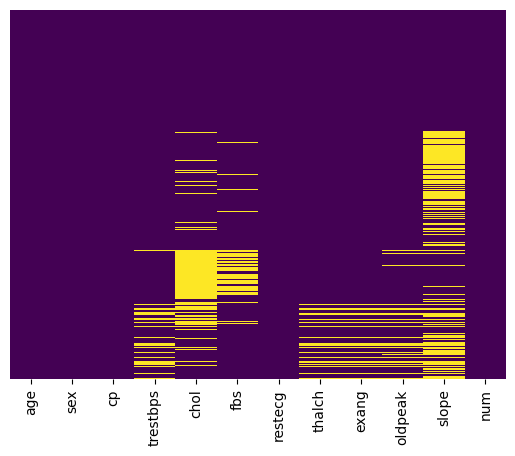

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df[cols].isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

In [ ]:
df['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [ ]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [ ]:
df['restecg'] = df['restecg'].replace(np.nan, 'normal')

In [ ]:
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg'])

In [ ]:
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping', nan], dtype=object)

In [ ]:
df

,age,trestbps,chol,fbs,thalch,exang,oldpeak,slope,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
0,63,145.0,233.0,True,150.0,False,2.3,downsloping,0,False,True,False,False,False,True,True,False,False
1,67,160.0,286.0,False,108.0,True,1.5,flat,2,False,True,True,False,False,False,True,False,False
2,67,120.0,229.0,False,129.0,True,2.6,flat,1,False,True,True,False,False,False,True,False,False
3,37,130.0,250.0,False,187.0,False,3.5,downsloping,0,False,True,False,False,True,False,False,True,False
4,41,130.0,204.0,False,172.0,False,1.4,upsloping,0,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,127.0,333.0,True,154.0,False,0.0,NaN,1,True,False,True,False,False,False,False,False,True
916,62,NaN,139.0,False,NaN,NaN,NaN,NaN,0,False,True,False,False,False,True,False,False,True
917,55,122.0,223.0,True,100.0,False,0.0,NaN,2,False,True,True,False,False,False,False,False,True
918,58,NaN,385.0,True,NaN,NaN,NaN,NaN,0,False,True,True,False,False,False,True,False,False


In [ ]:
df['slope'] = df['slope'].replace({np.nan: 0, 'flat': 0, 'upsloping': 1, 'downsloping': -1})

/tmp/ipython-input-411129674.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['slope']= df['slope'].replace({np.nan: 0, 'flat': 0, 'upsloping': 1, 'downsloping': -1})


Diving the dataset in two biological categories.


In [ ]:
df.loc[df['num'] != 0, 'num'] = 1

In [ ]:
df_male = df[(df['sex_Female'] == True)]
df_female = df[(df['sex_Male'] == True)]

In [ ]:
df_male.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,194.000000,192.000000,176.000000,192.000000,193.000000,194.000000
mean,52.474227,132.093750,256.573864,146.244792,0.668394,0.257732
std,9.496214,19.509202,63.401354,22.193048,0.957202,0.438517
min,30.000000,94.000000,141.000000,90.000000,0.000000,0.000000
25%,46.000000,120.000000,210.750000,130.000000,0.000000,0.000000
50%,53.000000,130.000000,248.500000,150.000000,0.000000,0.000000
75%,60.000000,140.000000,294.000000,163.000000,1.100000,1.000000
max,76.000000,200.000000,564.000000,192.000000,6.200000,1.000000


In [ ]:
df_female.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,726.000000,668.000000,542.000000,673.000000,665.000000,726.000000
mean,53.787879,132.341317,243.669742,135.063893,0.939850,0.632231
std,9.392685,18.261723,56.556253,26.390166,1.120425,0.482530
min,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,209.000000,117.000000,0.000000,0.000000
50%,55.000000,130.000000,236.500000,135.000000,0.600000,1.000000
75%,60.000000,140.000000,274.000000,154.000000,1.800000,1.000000
max,77.000000,200.000000,603.000000,202.000000,5.600000,1.000000


<Axes: xlabel='age', ylabel='Count'>

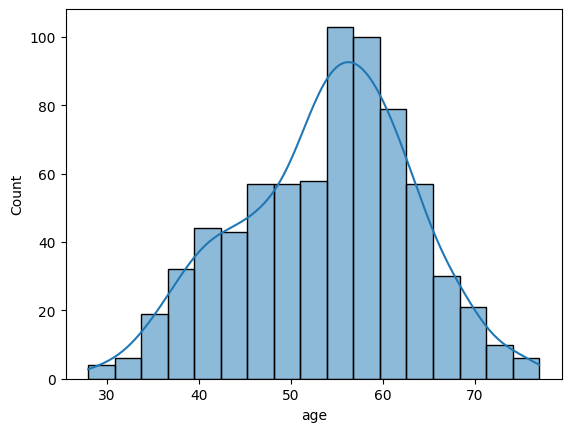

In [ ]:
sns.histplot(df_female['age'], kde=True)

#### Observation
- The dataset contains more amount of Females than Males.

In [ ]:
num_cols = ['age', 'trestbps',	'chol', 'thalch', 'oldpeak']

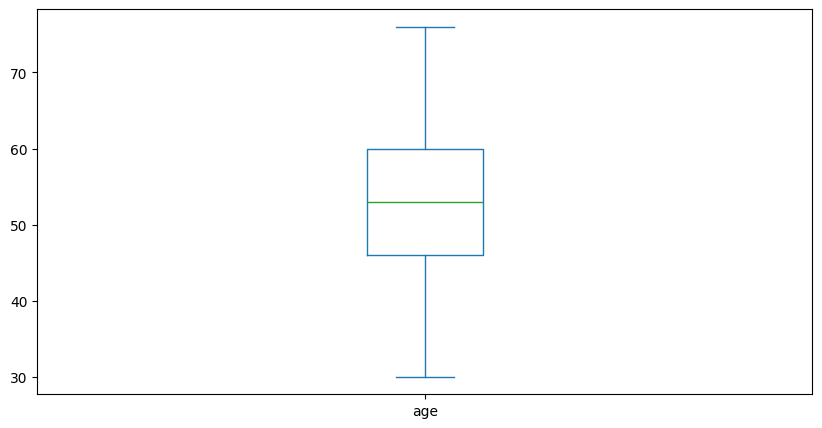

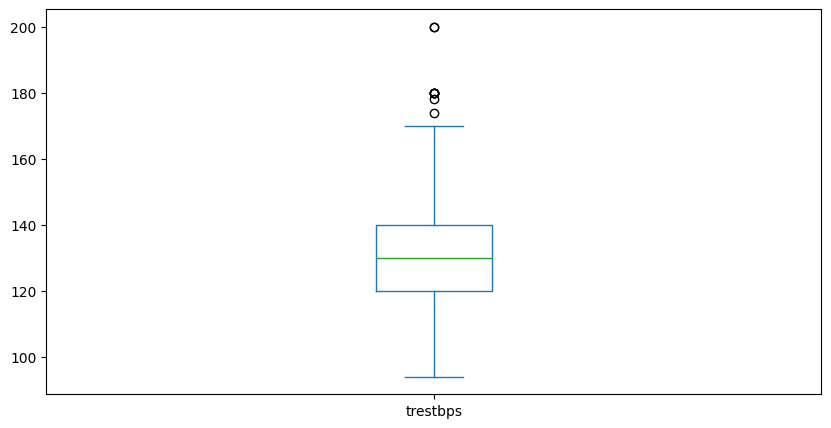

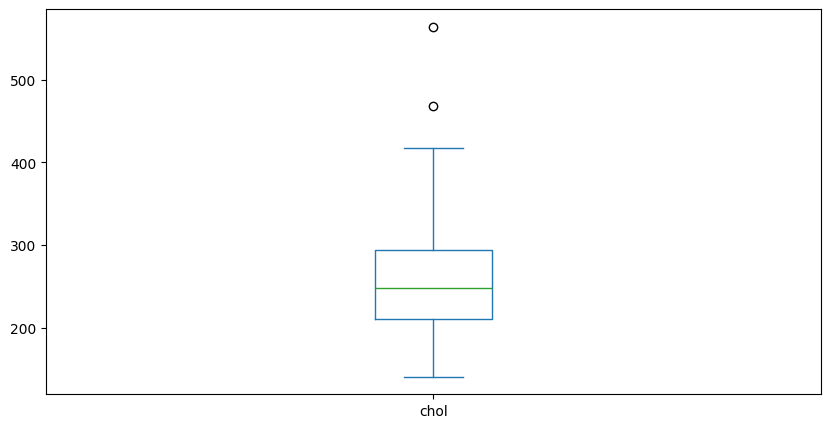

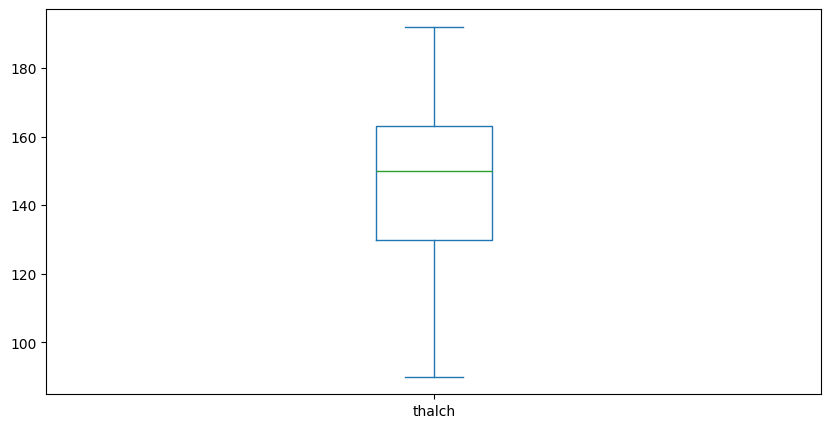

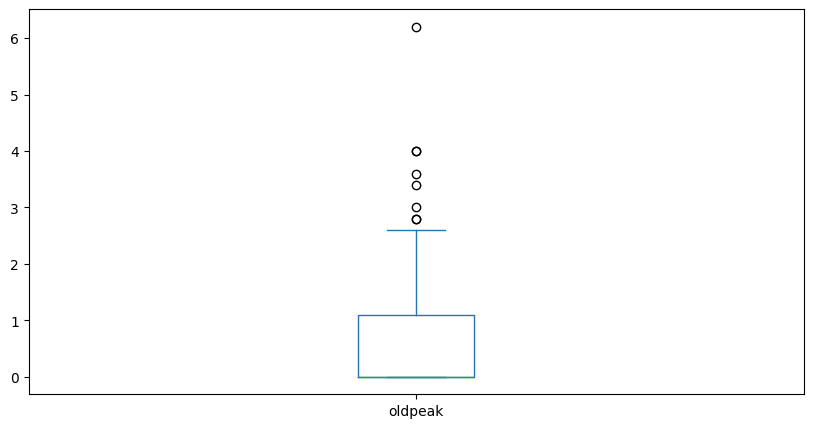

In [ ]:
for i , col in enumerate(num_cols):
  df_male.plot.box(y=col, figsize=(10, 5))
  plt.show()

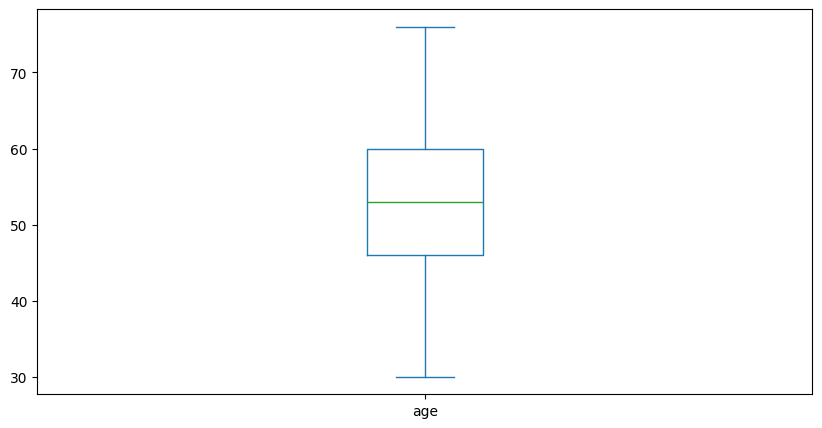

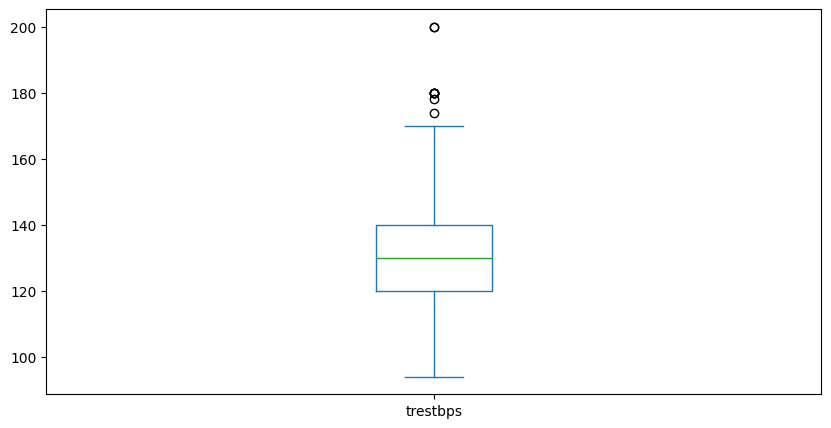

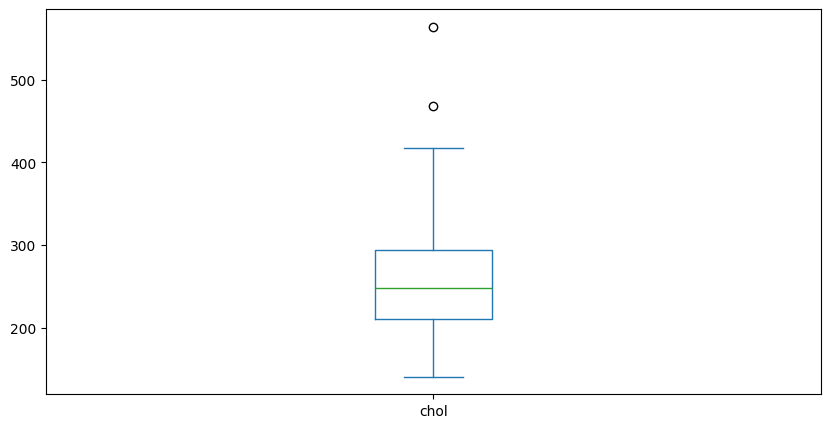

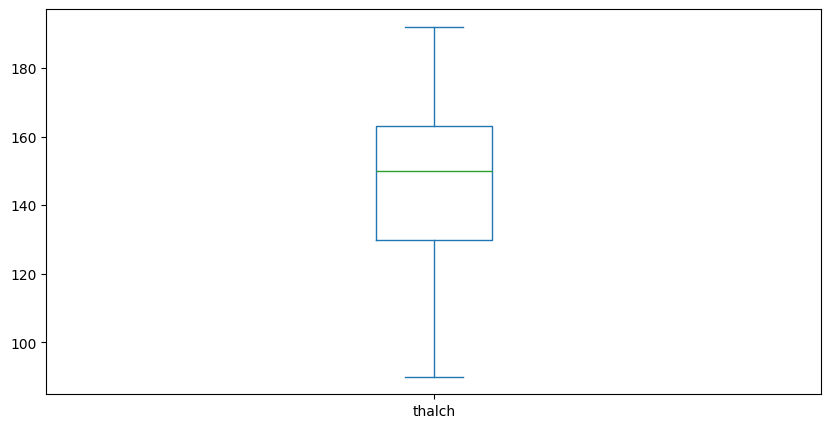

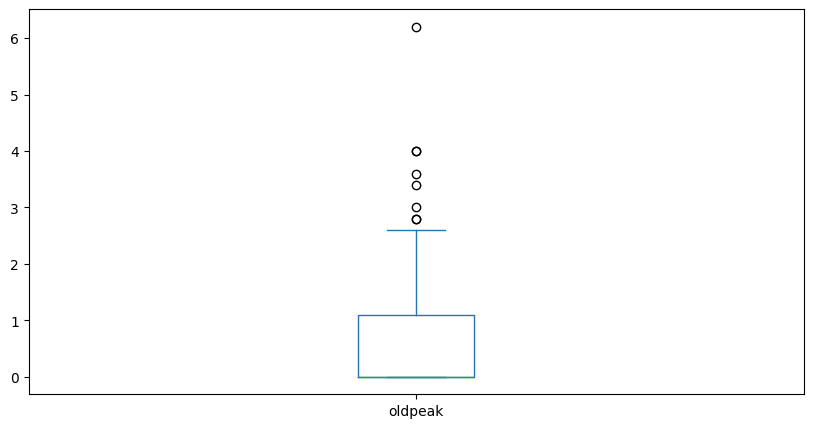

In [ ]:
for i , col in enumerate(num_cols):
  df_male.plot.box(y=col, figsize=(10, 5))
  plt.show()

In [ ]:
print('trestbps skew:', df['trestbps'].skew())
print('chol skew:', df['chol'].skew())
print('thalch skew:', df['thalch'].skew())
print('oldpeak skew:', df['oldpeak'].skew())

trestbps skew: 0.6301589151153714
chol skew: 1.3148668578248883
thalch skew: -0.21111858073161133
oldpeak skew: 1.0414266146339854


We will use Zscore method for capping thalch skew and we will use IQR method for other columns.

In [ ]:
X = df[df.columns].drop('num', axis=1)
y = df['num']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_model = Pipeline(()'imp', SimpleImputer(statergy='mode')), 'clf')